# Mineração de Dados - Trabalho 2: Regressão

- Felipe Churuyuki Chinen (496235)
- Victor Calefi Ramos (587230)

## Introdução

Um terremoto, ou sismo, quando de grande magnitude, é o resultado de uma súbita liberação de energia na crosta do planeta Terra, geralmente por conta do choque entre placas tectônicas, o que cria ondas sísmicas. A sismicidade ou atividade sísmica de uma área refere-se à frequência, tipo e tamanho dos terremotos registrados ao longo de um período de tempo na região.

| Magnitude | Categoria     | Efeitos                                                                                                                                            | Terremotos/Ano |
|-----------|---------------|----------------------------------------------------------------------------------------------------------------------------------------------------|----------------|
| 0-1.9     | Microssismos  | Microssismos não perceptíveis pelos humanos.                                                                                                       | ~3 M           |
| 2-2.9     | Muito pequeno | Geralmente não sentido, apenas detectado/registado por sismógrafos.                                                                                | ~370 Mil       |
| 3.0–3.9   | Pequeno       | Frequentemente sentido, mas raramente causa danos.                                                                                                 | ~49 Mil        |
| 4.0–4.9   | Ligeiro       | Tremor notório de objectos no interior de habitações, ruídos de choque entre objectos. Sismo significativo, mas com danos importantes improváveis. | ~6200          |
| 5.0–5.9   | Moderado      | Pode causar danos importantes em edifícios mal concebidos e em zonas restritas. Provoca apenas danos ligeiros em edifícios bem construídos.        | ~800           |
| 6.0–6.9   | Forte         | Pode ser destruidor em áreas habitadas num raio de até 160 quilómetros em torno do epicentro.                                                      | ~120           |
| 7.0–7.9   | Grande        | Pode provocar danos graves em zonas vastas.                                                                                                        | ~18            |
| 8.0-8.9   | Importante    | Pode causar danos sérios num raio de várias centenas de quilómetros em torno do epicentro.                                                         | ~1             |
| 9.0-9.9   | Excepcional   | Devasta zonas num raio de milhares de quilómetros em torno do epicentro.                                                                           | ~0.05          |
| 10.0+     | Extremo       | Desconhecido. Na história conhecida nunca foi registado um sismo desta magnitude.                                                                  | Desconhecido   |

### Conjunto de Dados

Os dados a serem explorados são referentes medições sismográficas feitas por organizações turcas entre os anos de 1910 e 2017. Todos os dados foram coletados e unificados pelo centro de pesquisas sísmicas da Universidade de Bogazici, a mais conceituada do país.

#### Atributos

| Atributo  | Descrição                                                                                                                                     |
|-----------|-----------------------------------------------------------------------------------------------------------------------------------------------|
| id        | identificador único do terremoto                                                                                                              |
| date      | data da ocorrência do terremoto                                                                                                               |
| time      | horário da ocorrência do terremoto                                                                                                            |
| lat       | latitude do local onde foi observada a medição                                                                                                |
| long      | longitude do local onde foi observada a medição                                                                                               |
| country   | país onde foi observada a medição                                                                                                             |
| city      | cidade onde foi observada a medição                                                                                                           |
| area      | região/bairro/distrito onde foi observada a medição                                                                                           |
| direction | direção de propagação                                                                                                                         |
| dist      | distância do epicentro                                                                                                                        |
| depth     | profundidade do epicentro                                                                                                                     |
| xm        |                                                                                                                                               |
| md        | magnitude da duração (duration magnitude scale - total length of the seismic wavetrain)                                                       |
| richter   | magnitude local (local magnitude scale - ml)                                                                                                  |
| mw        | magnitude de momento (moment magnitude scale)                                                                                                 |
| ms        | magnitude baseada nas amplitudes das ondas de Rayleigh (surface-wave magnitude scale - acoustic wave that travel along the surface of solids) |
| mb        | magnitude baseada nas amplitudes das ondas de Love (body-wave magnitude scale - wave that moves through the interior of solids)               |

Todas as escalas presentes no conjunto de dados podem ser usadas como aproximação para a magnitude do terremoto (sendo a mais conhecida a escala Richter). Uma análise conjunta de todas as escalas devem diminuir o erro da aproximação.

Algumas escalas como ml, ms, mb possuem aplicabilidade limitada pela extensão do terremoto, não sendo totalmente satisfatórias para medição de terremotos grandes (larga escala). Para isso utiliza-se a escala mw, conhecida como magnitude de momento, que pode ser uniformemente aplicada em terremotos de qualquer escala gerando valores mais confiáveis porém, mais complexos de serem computados.

## Inicialização

Para iniciarmos os estudos sobre os dados coletados iremos carregar as bibliotecas disponíveis no SciKit Learn e no Python que serão utilizadas ao longo do processo.

In [1]:
# Biblioteca NumPy para manipulação de dados
import numpy as np
# Biblioteca Pandas para manipulação de dados
import pandas as pd
# Biblioteca MatPlotLib para manipulação de gráficos
import matplotlib.pyplot as plt
# Biblioteca Seaborn para manipulação de gráficos
import seaborn as sns
# Biblioteca DateTime para manipulação de datas e horários
from datetime import datetime
# Bibliotecas SciKit Learn
# Biblioteca Preprocessing para manipulação de escala de dados
from sklearn.preprocessing import StandardScaler
# Biblioteca LinearModel para modelo de regressão linear
from sklearn.linear_model import LinearRegression, Lasso
# Biblioteca ModelSelection para divisão de dados de treino e teste
from sklearn.model_selection import train_test_split
# Biblioteca Metrics para medidas de avaliação do modelo
from sklearn.metrics import mean_squared_error
# Biblioteca SVM para modelos SVR
from sklearn.svm import SVR

# Localização do arquivo
filepath = 'earthquake.csv'
# Importanto os dados para um dataFrame
data = pd.read_csv(filepath, sep = ',')

Num primeiro momento iremos observar uma amostra do conjunto de dados para verificar se todos os dados foram carregados corretamente para um DataFrame Pandas.

In [2]:
# Amostragem de objetos do dataset
display(data)

,id,date,time,lat,long,country,city,area,direction,dist,depth,xm,md,richter,mw,ms,mb
0,2.000000e+13,2003.05.20,12:17:44 AM,39.04,40.38,turkey,bingol,baliklicay,west,0.1,10.0,4.1,4.1,0.0,NaN,0.0,0.0
1,2.010000e+13,2007.08.01,12:03:08 AM,40.79,30.09,turkey,kocaeli,bayraktar_izmit,west,0.1,5.2,4.0,3.8,4.0,NaN,0.0,0.0
2,1.980000e+13,1978.05.07,12:41:37 AM,38.58,27.61,turkey,manisa,hamzabeyli,south_west,0.1,0.0,3.7,0.0,0.0,NaN,0.0,3.7
3,2.000000e+13,1997.03.22,12:31:45 AM,39.47,36.44,turkey,sivas,kahvepinar_sarkisla,south_west,0.1,10.0,3.5,3.5,0.0,NaN,0.0,0.0
4,2.000000e+13,2000.04.02,12:57:38 AM,40.80,30.24,turkey,sakarya,meseli_serdivan,south_west,0.1,7.0,4.3,4.3,0.0,NaN,0.0,0.0
5,2.010000e+13,2005.01.21,12:04:03 AM,37.11,27.75,turkey,mugla,demirciler_milas,south_west,0.1,32.8,3.5,3.5,0.0,NaN,0.0,0.0
6,2.010000e+13,2012.06.24,12:07:22 AM,38.75,43.61,turkey,van,ilikaynak,south_west,0.1,9.4,4.5,0.0,4.5,NaN,0.0,0.0
7,1.990000e+13,1987.12.31,12:49:54 AM,39.43,27.98,turkey,balikesir,dikkonak_bigadic,south_east,0.1,26.0,3.8,3.8,0.0,NaN,0.0,0.0
8,2.000000e+13,2000.02.07,12:11:45 AM,40.05,34.07,turkey,kirikkale,kocabas_delice,south_east,0.1,1.0,3.8,3.8,0.0,NaN,0.0,0.0
9,2.010000e+13,2011.10.28,12:47:56 AM,38.76,43.54,turkey,van,degirmenozu,south_east,0.1,3.1,4.3,0.0,4.2,NaN,0.0,4.3


Não havendo nenhum problema com os objetos do dataset é hora de analisar algumas caracteristicas dos atributos e dados a fim de detectar anomalias que devem ser corrigidas na etapa de pré-processamento.

Um exemplo de anomalia seria uma medição de escala que excede o limite máximo da escala, sendo necessário corrigir antes de gerar os modelos para diminuir a taxa de erro.

In [3]:
# Verificando como estão os dados
data.describe()

,id,lat,long,dist,depth,xm,md,richter,mw,ms,mb
count,2.400700e+04,24007.000000,24007.000000,10062.000000,24007.000000,24007.000000,24007.000000,24007.000000,5003.000000,24007.000000,24007.000000
mean,1.991982e+13,37.929474,30.773229,3.175015,18.491773,4.056038,1.912346,2.196826,4.478973,0.677677,1.690561
std,2.060396e+11,2.205605,6.584596,4.715461,23.218553,0.574085,2.059780,2.081417,1.048085,1.675708,2.146108
min,1.910000e+13,29.740000,18.340000,0.100000,0.000000,3.500000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.980000e+13,36.190000,26.195000,1.400000,5.000000,3.600000,0.000000,0.000000,4.100000,0.000000,0.000000
50%,2.000000e+13,38.200000,28.350000,2.300000,10.000000,3.900000,0.000000,3.500000,4.700000,0.000000,0.000000
75%,2.010000e+13,39.360000,33.855000,3.600000,22.400000,4.400000,3.800000,4.000000,5.000000,0.000000,4.100000
max,2.020000e+13,46.350000,48.000000,95.400000,225.000000,7.900000,7.400000,7.200000,7.700000,7.900000,7.100000


Como os dados não apresentam anomalias de escala (mínimos e máximos) ou variação podemos prosseguir para a etapa de pré-processamento.

*Obs: os atributos date e time não aparecem na visualização acima, porém fazem parte do conjunto de dados e estão presentes no DataFrame.*

## Pré-processamento de Dados

### Seleção de Atributos

Como o conjunto de dados possui alguns atributos faltantes em alguns objetos, iremos primeiro identificar os atributos faltantes e quantos são:

In [4]:
#Verificando a quantidade de atributos faltantes
for column in data:
    print(column + ':' + ' ' + str(data[column].isna().sum()))

id: 0
date: 0
time: 0
lat: 0
long: 0
country: 0
city: 12253
area: 11030
direction: 13945
dist: 13945
depth: 0
xm: 0
md: 0
richter: 0
mw: 19004
ms: 0
mb: 0


Os atributos *city, area, direction, dist e mw* possuem valores faltantes ao longo do conjunto de dados.

| Atributo  | Quantidade | Proporção |
|-----------|------------|-----------|
| city      | 12253      | ~51%      |
| area      | 11030      | ~46%      |
| direction | 13945      | ~58%      |
| dist      | 13945      | ~58%      |
| mw        | 19004      | ~79%      |

Alguns atributos serão selecionados para serem removidos do conjunto de dados a fim de simplificar o mesmo e ajudar a diminuir a taxa de erro do modelo gerado:

- O atributo *id* será removido pois trata-se apenas de um identificador.

- Os atributos *country, city e area* serão removidos pois apenas identificam o local onde foi observado a medição. O mesmo resultado por ser obtido através das medidas de latitude e longitude presentes no conjunto de dados (site sugerido para confirmação do local: https://www.latlong.net/).

- Os atributos *direction, dist e mw* serão removidos devido à alta complexidade de inputação e ao fato de serem faltantes em mais da metade do conjunto de dados.

In [5]:
# Removendo os atributos
data = data.drop(columns = 'id')
data = data.drop(columns = 'country')
data = data.drop(columns = 'city')
data = data.drop(columns = 'area')
data = data.drop(columns = 'direction')
data = data.drop(columns = 'dist')
data = data.drop(columns = 'mw')

Após realizar a seleção de atributos e remover os atributos adequadamente iremos novamente observar a distribuição dos dados no DataFrame.

In [6]:
data.describe()

,lat,long,depth,xm,md,richter,ms,mb
count,24007.000000,24007.000000,24007.000000,24007.000000,24007.000000,24007.000000,24007.000000,24007.000000
mean,37.929474,30.773229,18.491773,4.056038,1.912346,2.196826,0.677677,1.690561
std,2.205605,6.584596,23.218553,0.574085,2.059780,2.081417,1.675708,2.146108
min,29.740000,18.340000,0.000000,3.500000,0.000000,0.000000,0.000000,0.000000
25%,36.190000,26.195000,5.000000,3.600000,0.000000,0.000000,0.000000,0.000000
50%,38.200000,28.350000,10.000000,3.900000,0.000000,3.500000,0.000000,0.000000
75%,39.360000,33.855000,22.400000,4.400000,3.800000,4.000000,0.000000,4.100000
max,46.350000,48.000000,225.000000,7.900000,7.400000,7.200000,7.900000,7.100000


### Tratamento do Atributo 'date'

O atributo *date*, como mencionado anteriormente, não aparece na descrição do DataFrame, entretanto, ao olharmos atentamente para os objetos do conjunto de dados podemos observar o seguinte: o atributo aparece no formato **YYYY.MM.DD**.

A fim de simplificar o uso dos dados pelo modelo, optamos por omitir o dia da ocorrência do sísmo e trabalhar somente com o ano e o mês. Para isso utilizamos a biblioteca DateTime do Python para poder separar o ano e o mês da cadeia presente no conjunto. 

Após realizar a separação dois novos atributos são incluídos ao conjunto: **year e month**.

*Obs: o atributo date foi removido do conjunto.*

In [7]:
# Array para armazenar os anos
year = []
# Array para armazenar os meses
month = []
# Seleciona o atributo 'date'
dateColumn = data['date']

# Separa o ano e o mes do atributo 'date' para cada objeto do dataset
for date in dateColumn:
    date = datetime.strptime(date, '%Y.%m.%d')
    year.append(date.year)
    month.append(date.month)
    
# Remove o atributo 'date'
data = data.drop(columns = 'date')
# Adiciona o atributo 'year'
data['year'] = year
# Adiciona o atributo 'month'
data['month'] = month

### Tratamento do Atributo 'time'

O mesmo ocorre com o atributo *time*, que não aparece na descrição do DataFrame. Entretanto, ao olharmos atentamente para os objetos do conjunto de dados podemos observar o seguinte: o atributo aparece no formato **HH:mm:ss AM/PM**.

A fim de simplificar o uso dos dados pelo modelo, optamos por omitir os segundos da ocorrência do sísmo e trabalhar somente com a hora e os minutos. Para isso utilizamos a biblioteca DateTime do Python para poder separar a hora e os minutos da cadeia presente no conjunto. 

Após realizar a separação dois novos atributos são incluídos ao conjunto: **hour e minute**.

*Obs: o atributo time foi removido do conjunto.*

In [8]:
# Array para armazenar as horas (formato 24 horas)
hour = []
# Array para armazenar os minutos
minute = []
# Seleciona o atributo 'time'
timeColumn = data['time']

# Separa as horas e os minutos do atributo 'time' para cada objeto do dataset
for time in timeColumn:
    time = datetime.strptime(time, '%I:%M:%S %p')
    hour.append(time.hour)
    minute.append(time.minute)
    
# Remove o atributo 'time'
data = data.drop(columns = 'time')
# Adiciona o atributo 'hour'
data['hour'] = hour
# Adiciona o atributo 'minute'
data['minute'] = minute

Após realizarmos as manipulações necessárias nos atributos *date e time* iremos novamente observar a distribuição dos dados no DataFrame.

In [9]:
data.describe()

,lat,long,depth,xm,md,richter,ms,mb,year,month,hour,minute
count,24007.000000,24007.000000,24007.000000,24007.000000,24007.000000,24007.000000,24007.000000,24007.000000,24007.000000,24007.000000,24007.000000,24007.000000
mean,37.929474,30.773229,18.491773,4.056038,1.912346,2.196826,0.677677,1.690561,1991.390469,6.424918,0.000208,29.516016
std,2.205605,6.584596,23.218553,0.574085,2.059780,2.081417,1.675708,2.146108,20.360051,3.377425,0.014430,17.358036
min,29.740000,18.340000,0.000000,3.500000,0.000000,0.000000,0.000000,0.000000,1910.000000,1.000000,0.000000,0.000000
25%,36.190000,26.195000,5.000000,3.600000,0.000000,0.000000,0.000000,0.000000,1981.000000,4.000000,0.000000,15.000000
50%,38.200000,28.350000,10.000000,3.900000,0.000000,3.500000,0.000000,0.000000,1995.000000,6.000000,0.000000,30.000000
75%,39.360000,33.855000,22.400000,4.400000,3.800000,4.000000,0.000000,4.100000,2008.000000,9.000000,0.000000,45.000000
max,46.350000,48.000000,225.000000,7.900000,7.400000,7.200000,7.900000,7.100000,2017.000000,12.000000,1.000000,59.000000


### Conversão de Tipos de Dados

Nessa etapa iremos apenas converter os atributos que ainda são inteiros no conjunto em reais, a fim de evitar avisos nas próximas etapas (avisos de tipos diferentes de dados).

In [10]:
# Verifica os tipos dos dados
data.dtypes

lat        float64
long       float64
depth      float64
xm         float64
md         float64
richter    float64
ms         float64
mb         float64
year         int64
month        int64
hour         int64
minute       int64
dtype: object

In [11]:
# Transforma todos os dados do conjunto em float64
data = data.astype('float64')
# Verifica os tipos dos dados
data.dtypes

lat        float64
long       float64
depth      float64
xm         float64
md         float64
richter    float64
ms         float64
mb         float64
year       float64
month      float64
hour       float64
minute     float64
dtype: object

### Análise de Distribuição dos Dados

A seguir estão os gráficos de distribuição dos dados ao longo do conjunto:

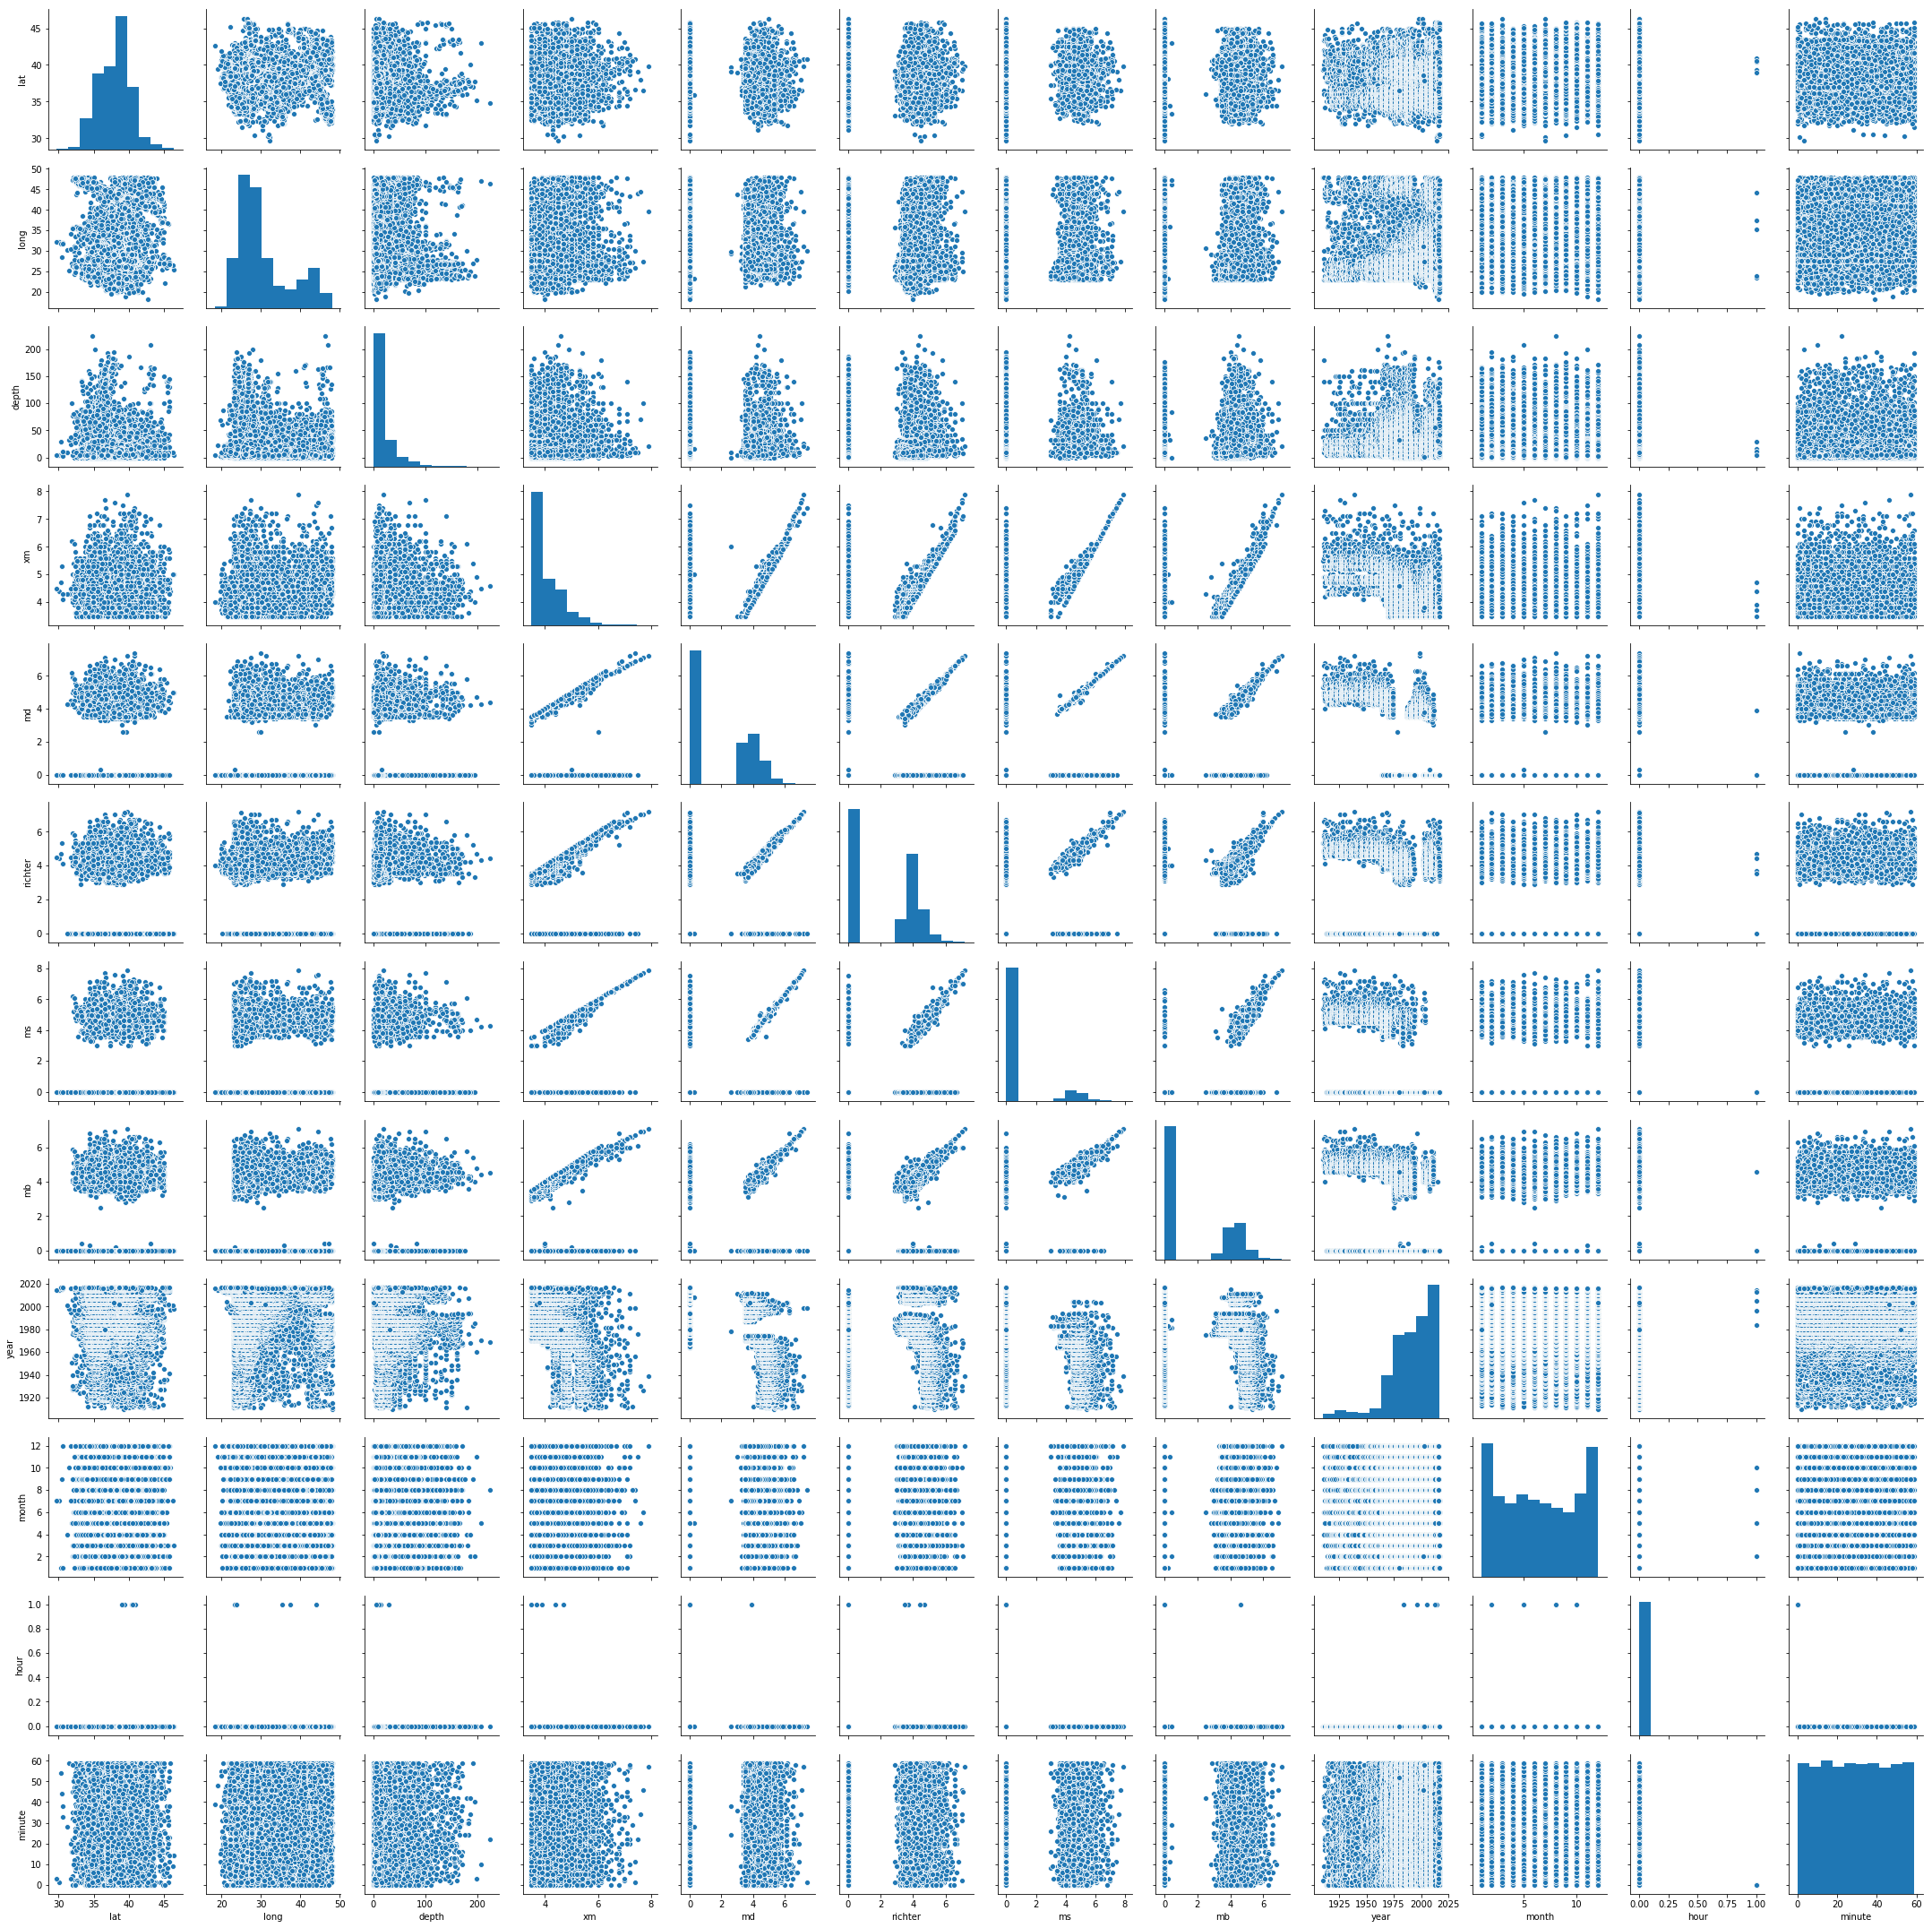

In [12]:
sns.pairplot(data)

Text(0.5,1,'Distribuição: Latitude')

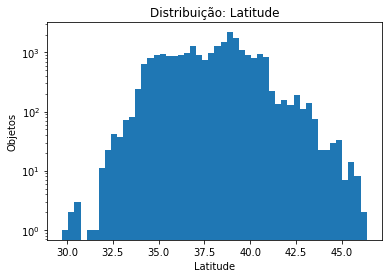

In [13]:
# Distribuição do atributo 'lat'
plt.hist(data['lat'], bins=50, log=True)
plt.xlabel('Latitude')
plt.ylabel('Objetos')
plt.title('Distribuição: Latitude')

Para o atributo 'lat' podemos observar que os dados estão bem distribuídos com um leve pico entre as latitudes 35 e 40.

Text(0.5,1,'Distribuição: Longitude')

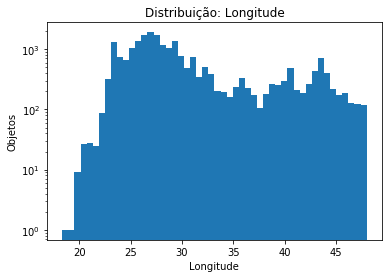

In [14]:
# Distribuição do atributo 'long'
plt.hist(data['long'], bins=50, log=True)
plt.xlabel('Longitude')
plt.ylabel('Objetos')
plt.title('Distribuição: Longitude')

Para o atributo 'long' podemos observar que os dados estão bem distribuídos com um leve pico entre as longitudes 25 e 30.

Text(0.5,1,'Distribuição: Profundidade')

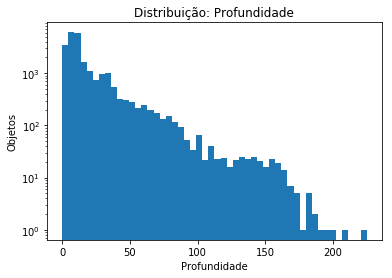

In [15]:
# Distribuição do atributo 'depth'
plt.hist(data['depth'], bins=50, log=True)
plt.xlabel('Profundidade')
plt.ylabel('Objetos')
plt.title('Distribuição: Profundidade')

No caso do atributo 'depth', que indica a profundidade do epicentro do terremoto:

Os terremotos possuem algumas classificações dependendo da profundidade onde foi observado seu epicentro. As classificações são as seguintes:

| Profundidade (km) | Zona         |
|-------------------|--------------|
| 0-69              | Superficiais |
| 70-349            | Intermédios  |
| 350-669           | Profundos    |
| 670+              | Raros        |

O gráfico acima nos mostra que a maioria dos terremotos presentes no conjunto foram registrados entre 0km e 150km, que segundo a tabela de classificação acima trata-se de terremotos superficiais e intermédios, com epicentro mais próximos à superfície terrestre.

Text(0.5,1,'Distribuição: xm')

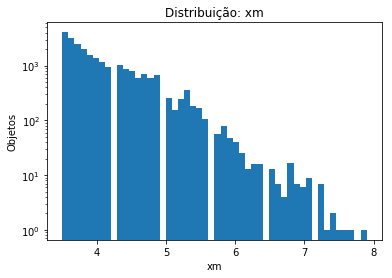

In [16]:
# Distribuição do atributo 'xm'
plt.hist(data['xm'], bins=50, log=True)
plt.xlabel('xm')
plt.ylabel('Objetos')
plt.title('Distribuição: xm')

Para a escala de magnitude 'xm' é possível observar que ela consegue medir a maioria dos terremotos do conjunto, apresentando algumas poucas lacunas onde a escala não representa corretamente a magnitude daquele terremoto.

Text(0.5,1,'Distribuição: md')

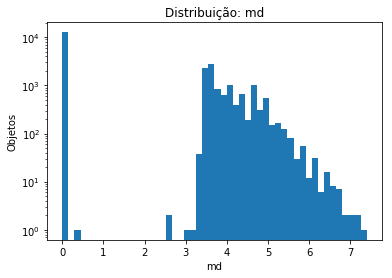

In [17]:
# Distribuição do atributo 'md'
plt.hist(data['md'], bins=50, log=True)
plt.xlabel('md')
plt.ylabel('Objetos')
plt.title('Distribuição: md')

Para a escala de magnitude 'md' é possível observar que ela consegue medir a maioria dos terremotos pequenos à fortes do conjunto, apresentando algumas lacunas onde a escala não representa corretamente a magnitude daquele terremoto (microssismos e muito pequenos).

Text(0.5,1,'Distribuição: Richter')

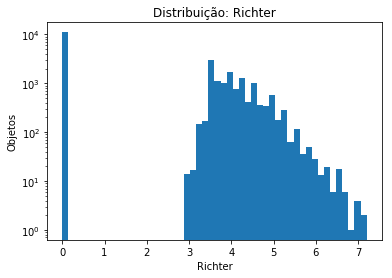

In [18]:
# Distribuição do atributo 'richter'
plt.hist(data['richter'], bins=50, log=True)
plt.xlabel('Richter')
plt.ylabel('Objetos')
plt.title('Distribuição: Richter')

Para a escala de magnitude 'richter' é possível observar que ela consegue medir a maioria dos terremotos pequenos à fortes do conjunto, apresentando algumas lacunas onde a escala não representa corretamente a magnitude daquele terremoto (microssismos e muito pequenos).

Text(0.5,1,'Distribuição: ms')

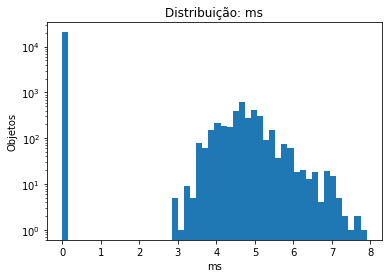

In [19]:
# Distribuição do atributo 'ms'
plt.hist(data['ms'], bins=50, log=True)
plt.xlabel('ms')
plt.ylabel('Objetos')
plt.title('Distribuição: ms')

Para a escala de magnitude 'ms' é possível observar que ela consegue medir a maioria dos terremotos pequenos à fortes do conjunto, apresentando algumas lacunas onde a escala não representa corretamente a magnitude daquele terremoto (microssismos e muito pequenos).

Text(0.5,1,'Distribuição: mb')

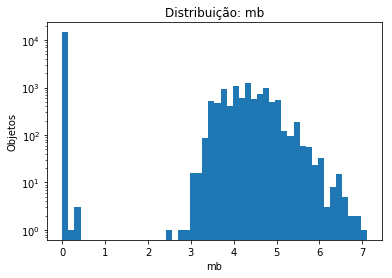

In [20]:
# Distribuição do atributo 'mb'
plt.hist(data['mb'], bins=50, log=True)
plt.xlabel('mb')
plt.ylabel('Objetos')
plt.title('Distribuição: mb')

Para a escala de magnitude 'mb' é possível observar que ela consegue medir a maioria dos terremotos pequenos à fortes do conjunto, apresentando algumas lacunas onde a escala não representa corretamente a magnitude daquele terremoto (microssismos e muito pequenos).

**Note que para todas as escalas de magnitudes acima, apenas uma conseguiu medir a maioria dos microssismos e muito pequenos, sendo que as demais apenas captaram os terremotos pequenos à fortes.**

Text(0.5,1,'Distribuição: Ano')

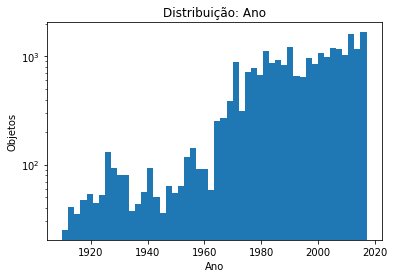

In [21]:
# Distribuição do atributo 'year'
plt.hist(data['year'], bins=50, log=True)
plt.xlabel('Ano')
plt.ylabel('Objetos')
plt.title('Distribuição: Ano')

Ao observarmos o atributo 'year' podemos concluir que o número de atividades sísmicas foi crescendo ao longo dos 100 anos de medição, sendo que a maioria dos terremotos registrados ocorreram entre os anos de 1980 e 2017.

Text(0.5,1,'Distribuição: Mês')

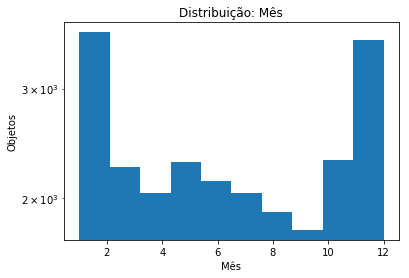

In [22]:
# Distribuição do atributo 'month'
plt.hist(data['month'], log=True)
plt.xlabel('Mês')
plt.ylabel('Objetos')
plt.title('Distribuição: Mês')

Através do atributo 'month' podemos observar uma periodicidade/regularidade na ocorrência de terremotos no início do ano (nos meses de Janeiro e Fereveiro) e no final do ano (nos meses de Outubro à Dezembro).

*Um outro dado interessante é que esses meses de maior incidência de terremotos ocorrem durante o inverno turco.*

Text(0.5,1,'Distribuição: Hora')

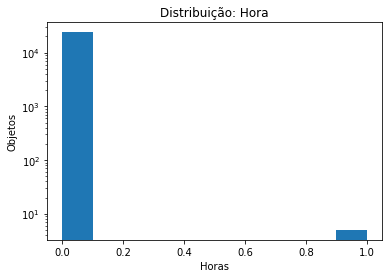

In [23]:
# Distribuição do atributo 'hour'
plt.hist(data['hour'], log=True)
plt.xlabel('Horas')
plt.ylabel('Objetos')
plt.title('Distribuição: Hora')

O atributo 'hour' não é muito informativo, pois as medições foram efetuadas somente entre 00h e 01h (horário local).

Text(0.5,1,'Distribuição: Minutos')

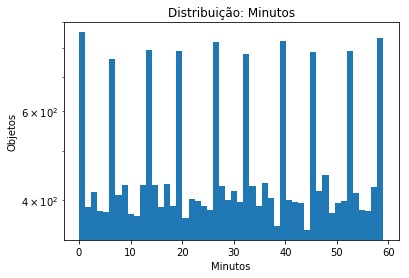

In [24]:
# Distribuição do atributo 'minute'
plt.hist(data['minute'], bins=50, log=True)
plt.xlabel('Minutos')
plt.ylabel('Objetos')
plt.title('Distribuição: Minutos')

Diferentemente do atributo 'hour', o atributo 'minutes' acaba sendo um pouco mais informativo. Dele podemos observar uma certa periodicidade nos picos das medições sísmicas, que parecem ocorrer de 8 em 8 minutos.

### Mudança de Escala

Após extrairmos algumas informações a respeito do conjunto analisando a distribuição dos dados, iremos adequar a escala dos dados para os métodos de regressão à seguir.

Essa etapa é muito importante pois os dados até agora estavam totalmente fora de escala, o que prejudicaria a geração de um modelo preditor.

Para isso iremos utilizar a função StandardScaler da biblioteca de pré-processamento do SciKit Learn, que irá padronizar a escala para todos os atributos do conjunto.

In [25]:
# Salva a coluna dos indexes
indexes = data.index
# Salva a linha contendo o nome dos atributos
columns = data.columns
# Instância o StandardScaler
scaler = StandardScaler()
# Aplica nova escala aos dados
data = scaler.fit_transform(data)
# Transforma a array retornada em um DataFrame novamente
data = pd.DataFrame(data,indexes,columns)
# Amostragem de objetos do dataset
display(data)

,lat,long,depth,xm,md,richter,ms,mb,year,month,hour,minute
0,0.503512,1.459007,-0.365740,0.076579,1.062103,-1.055469,-0.404421,-0.787750,0.570223,-0.421904,-0.014433,-0.721065
1,1.296961,-0.103764,-0.572475,-0.097614,0.916454,0.866338,-0.404421,-0.787750,0.766690,0.466366,-0.014433,-1.527625
2,0.294948,-0.480408,-0.796439,-0.620196,-0.928442,-1.055469,-0.404421,0.936337,-0.657697,-0.421904,-0.014433,0.661608
3,0.698474,0.860628,-0.365740,-0.968584,0.770804,-1.055469,-0.404421,-0.787750,0.275522,-1.014083,-0.014433,0.085494
4,1.301495,-0.080983,-0.494950,0.424967,1.159203,-1.055469,-0.404421,-0.787750,0.422873,-0.717993,-0.014433,1.583391
5,-0.371549,-0.459146,0.616254,-0.968584,0.770804,-1.055469,-0.404421,-0.787750,0.668457,-1.606262,-0.014433,-1.470014
6,0.372026,1.949556,-0.391582,0.773355,-0.928442,1.106564,-0.404421,-0.787750,1.012274,-0.125814,-0.014433,-1.297179
7,0.680338,-0.424215,0.323379,-0.446002,0.916454,-1.055469,-0.404421,-0.787750,-0.215646,1.650725,-0.014433,1.122500
8,0.961446,0.500690,-0.753369,-0.446002,0.916454,-1.055469,-0.404421,-0.787750,0.422873,-1.310173,-0.014433,-1.066734
9,0.376560,1.938925,-0.662922,0.424967,-0.928442,0.962429,-0.404421,1.215919,0.963158,1.058545,-0.014433,1.007277


### Coeficiente de Correlação

Como última análise iremos observar os Coeficientes de Correlação a fim de tentar detectar atributos que possuem alto grau de correlação, o que nos indicaria que uma possível variação em um dos atributos altamente correlacionados afetaria de forma perceptível o outro atributo.

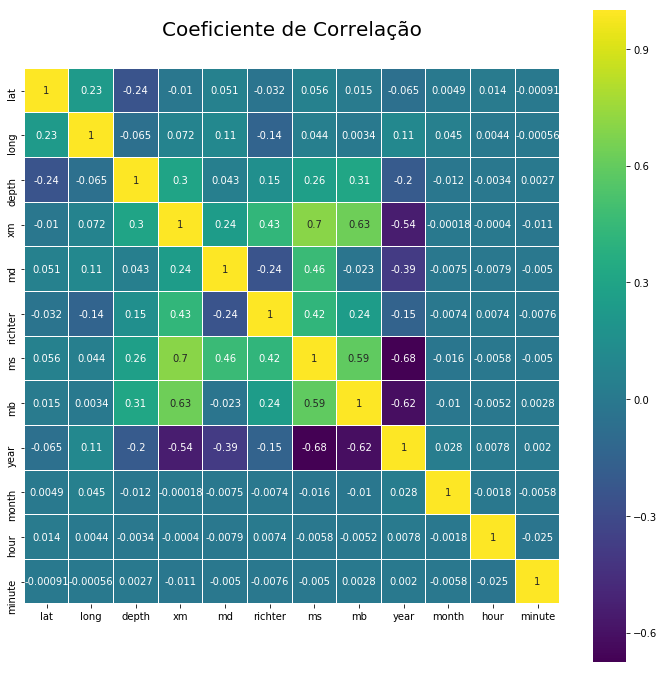

In [26]:
# Define cor do colormap
colormap = plt.cm.viridis
# Dimensiona a figura
plt.figure(figsize=(12,12))
# Define o titulo do gráfico com padding
plt.title('Coeficiente de Correlação', y=1.05, size=20)
# Gera um gráfico de calor com as correlações
sns.heatmap(data.corr(), linewidths=0.05, vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

Podemos observar então que os atributos que mais se correlacionam são: **xm e ms, xm e mb, mb e ms**.

Algumas coisas que valem a pena destacar:

- Os atributos ano, mes, hora e minuto que descrevem o período em que ocorreu o terremoto parecem não afetar muito as escalas usadas em medição.
- Os atributos latitude e longitude afetam muito pouco as escalas de magnitude.
- O atributo profundidade afeta algumas escalas de magnitude.
- Escalas de magnitude tendem a afetar umas às outras.

## Processamento de Dados

A fim de identificar e selecionar o melhor modelo de predição dos dados iremos gerar 5 modelos distintos e então compará-los utilizando uma métrica.

Os 5 modelos serão induzidos utilizando o mesmo holdout para fins de padronização.

A métrica utilizada para avaliadar o desempenho do preditor será a taxa média de erro quadrático, assim, preditores com uma taxa média de erro que tendem a zero serão a melhor escolha.

### Divisão dos dados de treino e teste

Os método de avaliação da qualidade do modelo será feito utilizando um holdout cross validation. Para isso os dados serão dividos em dados de teste e treino, sendo 80% dos dados para treino e 20% para teste.

In [27]:
# Cria uma cópia local do conjunto de dados
localData = data.copy()
# Separa o atributo alvo
target = localData['richter']
# Remove o atributo alvo do conjunto de dados local
localData = localData.drop(columns = 'richter')
# Cria partições de treino e teste
feature_train, feature_test, target_train, target_test = train_test_split(localData, target, test_size=0.2, random_state=0)

### Regressão Linear

O primeiro modelo a ser testado é a Regressão Linear Múltipla, onde uma equação que descreve os dados é utilizada para se estimar o valor esperado de uma variável y, dados os valores de algumas outras variáveis x.

#### Indução do modelo

In [28]:
# Regressão linear
LR = LinearRegression().fit(feature_train, target_train)
target_train_predict = LR.predict(feature_train)
target_test_predict = LR.predict(feature_test)
LRMSE_train = mean_squared_error(target_train, target_train_predict)
LRMSE_test = mean_squared_error(target_test, target_test_predict)
print('MSE - Treino: ' + str(LRMSE_train))
print('MSE - Teste: ' + str(LRMSE_test))

MSE - Treino: 0.47092944488925825
MSE - Teste: 0.46268097205382414


#### Análise do Modelo

(-2, 5)

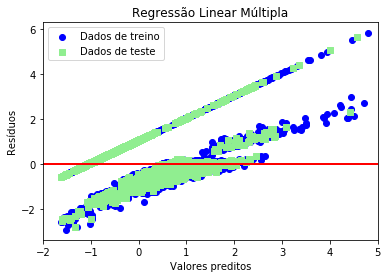

In [29]:
plt.scatter(target_train_predict, target_train_predict - target_train, c='blue', marker='o', label='Dados de treino')
plt.scatter(target_test_predict, target_test_predict - target_test, c='lightgreen', marker='s', label='Dados de teste')
plt.xlabel('Valores preditos')
plt.ylabel('Resíduos')
plt.legend(loc='upper left')
plt.title('Regressão Linear Múltipla')
plt.hlines(y=0, xmin=-2, xmax=5, lw=2, color='red')
plt.xlim([-2,5])

Como a taxa média de erro do modelo está próxima de quase metade dos dados, o modelo gerado não é uma boa opção como preditor. Isso pode ser confirmado ao observarmos o gráfico de sobreposição de valores preditos, tanto de teste quanto de treino, pois quanto menor a sobreposição maior a taxa média de erro.

### Regressão Linear com Lasso

LASSO, conhecido por ser um *Shirinkage Method*, tem um mecanismo de penalização dos coeficientes com um alto grau de correlação entre si, mas que usa o mecanismo de penalizar os coeficientes de acordo com o seu valor absoluto usando o mecanismo de minimizar o erro quadrático. Isso é feito através da penalização do coeficiente até que o mesmo convirja para zero; o que naturalmente vai eliminar o atributo e reduzir a dimensionalidade do modelo.

#### Indução do modelo

In [30]:
# Regressão linear com Lasso
penalizacoes = [1, 0.1, 0.001, 0.0001, 0.0000000000001]

for i in penalizacoes:
    LRLasso = Lasso(alpha=i).fit(feature_train, target_train)
    target_train_predict = LRLasso.predict(feature_train)
    target_test_predict = LRLasso.predict(feature_test)
    LRLassoMSE_train = mean_squared_error(target_train, target_train_predict)
    LRLassoMSE_test = mean_squared_error(target_test, target_test_predict)
    print('Penalização ' + str(i))
    print('MSE - Treino: ' + str(LRLassoMSE_train))
    print('MSE - Teste: ' + str(LRLassoMSE_test))
    print('\n')

Penalização 1
MSE - Treino: 0.9979410999718487
MSE - Teste: 1.0082786649749587


Penalização 0.1
MSE - Treino: 0.6020159384685698
MSE - Teste: 0.6073800146631142


Penalização 0.001
MSE - Treino: 0.4709511458685959
MSE - Teste: 0.4627868768045396


Penalização 0.0001
MSE - Treino: 0.4709296682091477
MSE - Teste: 0.46269114691327334


Penalização 1e-13
MSE - Treino: 0.47092944488925825
MSE - Teste: 0.46268097205383407




#### Análise do Modelo

A fim de tentarmos aproximar a taxa média de erro de zero, diminuimos as penalizações a serem somadas no cálculo final do erro. Porém, podemos observar que quanto menor a penalização mais nos aproximamos da taxa média de erro de uma regressão linear, ou seja, o modelo utilizando LASSO não converge, e portanto o modelo linear ainda seria uma melhor opção.

### Regressão usando SVR Kernel RBF

A partir desse ponto os modelos gerados serão baseados em SVR (*Support Vector Regression*) utilizando diferentes kernels de transformação.

A SVR usa os mesmos princípios da classificação SVM, com algumas pequenas diferenças. Primeiro de tudo, como a saída é um número real, é muito difícil prever a informação, que tem infinitas possibilidades. No caso de regressão, uma margem de tolerância (ε) é definida em aproximação ao SVM, onde a ideia principal é sempre a mesma: minimizar o erro individualizando o hiperplano que maximiza a margem.

De forma simplificada, utilizar o truque de kernel significa transformar dados em outra dimensão (dimensões maiores) que tenha uma margem de divisão clara entre as classes de dados.

#### Indução do Modelo

In [31]:
# Regressão usando Support Vector Regressor com Kernel RBF
SVRRBF = SVR(kernel='rbf', gamma='scale').fit(feature_train, target_train)
target_train_predict = SVRRBF.predict(feature_train)
target_test_predict = SVRRBF.predict(feature_test)
SVRRBFMSE_train = mean_squared_error(target_train, target_train_predict)
SVRRBFMSE_test = mean_squared_error(target_test, target_test_predict)
print('MSE - Treino: ' + str(SVRRBFMSE_train))
print('MSE - Teste: ' + str(SVRRBFMSE_test))

MSE - Treino: 0.1995669869263438
MSE - Teste: 0.22346508877387658


#### Análise do Modelo

(-2, 3)

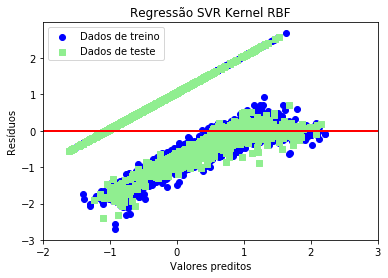

In [32]:
plt.scatter(target_train_predict, target_train_predict - target_train, c='blue', marker='o', label='Dados de treino')
plt.scatter(target_test_predict, target_test_predict - target_test, c='lightgreen', marker='s', label='Dados de teste')
plt.xlabel('Valores preditos')
plt.ylabel('Resíduos')
plt.legend(loc='upper left')
plt.title('Regressão SVR Kernel RBF')
plt.hlines(y=0, xmin=-2, xmax=3, lw=2, color='red')
plt.xlim([-2,3])

Como a taxa média de erro do modelo está próxima de 1/5 dos dados, o modelo gerado é uma boa opção como preditor. Isso pode ser confirmado ao observarmos o gráfico de sobreposição de valores preditos, tanto de teste quanto de treino, pois quanto menor a sobreposição maior a taxa média de erro.

- Existem poucos valores não sobrepostos.
- Esses poucos valores não sobrepostos estão a uma distância pequena uns dos outros.

### Regressão usando SVR Kernel Linear

#### Indução do Modelo

In [33]:
# Regressão usando Support Vector Regressor com Kernel Linear
SVRLinear = SVR(kernel='linear', gamma='scale').fit(feature_train, target_train)
target_train_predict = SVRLinear.predict(feature_train)
target_test_predict = SVRLinear.predict(feature_test)
SVRLinearMSE_train = mean_squared_error(target_train, target_train_predict)
SVRLinearMSE_test = mean_squared_error(target_test, target_test_predict)
print('MSE - Treino: ' + str(SVRLinearMSE_train))
print('MSE - Teste: ' + str(SVRLinearMSE_test))

MSE - Treino: 0.7277160755752273
MSE - Teste: 0.6849172983570415


#### Análise do Modelo

(-4, 8)

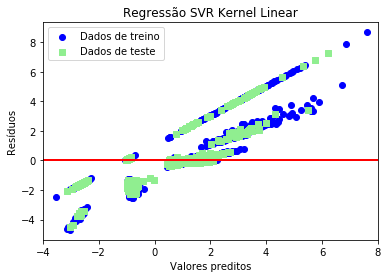

In [34]:
plt.scatter(target_train_predict, target_train_predict - target_train, c='blue', marker='o', label='Dados de treino')
plt.scatter(target_test_predict, target_test_predict - target_test, c='lightgreen', marker='s', label='Dados de teste')
plt.xlabel('Valores preditos')
plt.ylabel('Resíduos')
plt.legend(loc='upper left')
plt.title('Regressão SVR Kernel Linear')
plt.hlines(y=0, xmin=-4, xmax=8, lw=2, color='red')
plt.xlim([-4,8])

Como a taxa média de erro do modelo é maior do que metade dos dados, o modelo gerado é certamente uma péssima opção como preditor. Isso pode ser confirmado ao observarmos o gráfico de sobreposição de valores preditos, tanto de teste quanto de treino, pois quanto menor a sobreposição maior a taxa média de erro.

- O Kernel separou os dados de forma não uniforme.
- A previsão dos dados de teste estão muito distantes das previsões dos dados de treino.

### Regressão usando SVR Kernel Polinomial

#### Indução do Modelo

In [35]:
# Regressão linear com Lasso
degree = [2, 3]

for d in degree:
    # Regressão usando Support Vector Regressor com Kernel Polinomial
    SVRPoly = SVR(kernel='poly', degree=d, gamma='scale').fit(feature_train, target_train)
    target_train_predict = SVRPoly.predict(feature_train)
    target_test_predict = SVRPoly.predict(feature_test)
    SVRPolyMSE_train = mean_squared_error(target_train, target_train_predict)
    SVRPolyMSE_test = mean_squared_error(target_test, target_test_predict)
    print('MSE - Treino: ' + str(SVRPolyMSE_train))
    print('MSE - Teste: ' + str(SVRPolyMSE_test))

MSE - Treino: 0.5785373349934719
MSE - Teste: 0.5692212803194397
MSE - Treino: 0.32046944759313156
MSE - Teste: 0.3155804103908492


#### Análise do Modelo

(-15, 25)

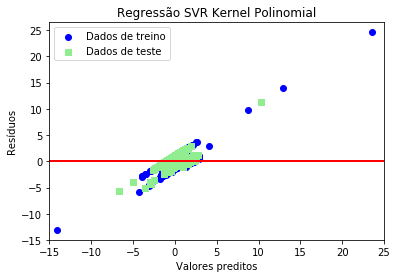

In [37]:
plt.scatter(target_train_predict, target_train_predict - target_train, c='blue', marker='o', label='Dados de treino')
plt.scatter(target_test_predict, target_test_predict - target_test, c='lightgreen', marker='s', label='Dados de teste')
plt.xlabel('Valores preditos')
plt.ylabel('Resíduos')
plt.legend(loc='upper left')
plt.title('Regressão SVR Kernel Polinomial')
plt.hlines(y=0, xmin=-15, xmax=25, lw=2, color='red')
plt.xlim([-15,25])

## Conclusão

Através da análise do desempenho de cada preditor gerado e visto que o modelo gerado foi baseado num conjunto específico de dados, o modelo mais recomendado para predições é o modelo baseado em SVR com Kernel RBF, pois sua taxa média de erro foi a menor de todas.

**Obs:** É possível que o atributo 'dist' que foi removido do conjunto de dados durante a etapa de pré-processamento ajudasse alguns modelos a diminuir sua taxa média de erro, porém, como aproximadamente 58% dos dados não tinham um valor para esse atributo e uma inputação arbitrária não seria adequada os modelos gerados podem ser melhorados.